In [1]:
import pickle
import os
import time
import numpy as np
import ast


import cooltools
import cooltools.lib.plotting
#import functions

import shutil

import pandas as pd
import warnings
import h5py 
import glob

#from scorefunctions import *
import matplotlib.pyplot as plt
import sys

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


### loading data

In [4]:
directory='/project/fudenber_735/polychrom/Dynamic_boundary_model/'



In [7]:
file = pd.read_csv(directory + 'data/fripscore.csv')

In [32]:
file = pd.read_csv('data/fripscore.csv')
file

,lifetime,velocity,clife,cof,fripscore
0,1500.0,0.33,10.0,15000.0,0.010697
1,1500.0,1.00,10.0,15000.0,0.011799
2,1500.0,3.00,10.0,15000.0,0.013762
3,166.0,0.33,10.0,15000.0,0.009652
4,166.0,1.00,10.0,15000.0,0.009487
...,...,...,...,...,...
2677,166.0,1.00,75.0,500.0,0.009737
2678,166.0,3.00,75.0,500.0,0.008883
2679,500.0,0.33,75.0,500.0,0.009356
2680,500.0,1.00,75.0,500.0,0.009279


In [8]:
file = pd.read_csv(directory + 'data/fripscore.csv')
file
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)
print(unique_cof)

[1.00e-01 2.00e-01 3.00e-01 5.00e-01 7.50e-01 1.00e+00 1.25e+00 1.50e+00
 3.00e+00 1.00e+01 1.50e+01 3.00e+01 5.00e+01 1.50e+02 3.00e+02 5.00e+02
 1.50e+03 3.00e+03 5.00e+03 1.50e+04 5.00e+04]


In [9]:
file = file[(file[' clife']<=1500)&(file[' clife']>4.5)&(file[' cof']>=0.3)&(file[' cof']<300)]

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


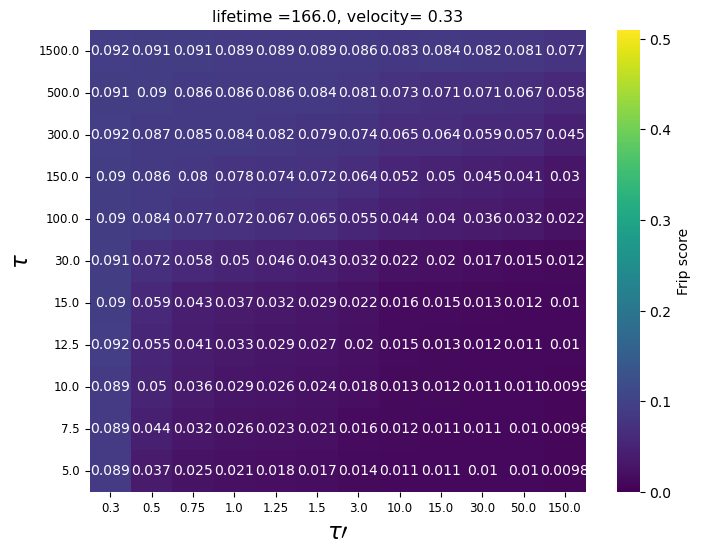

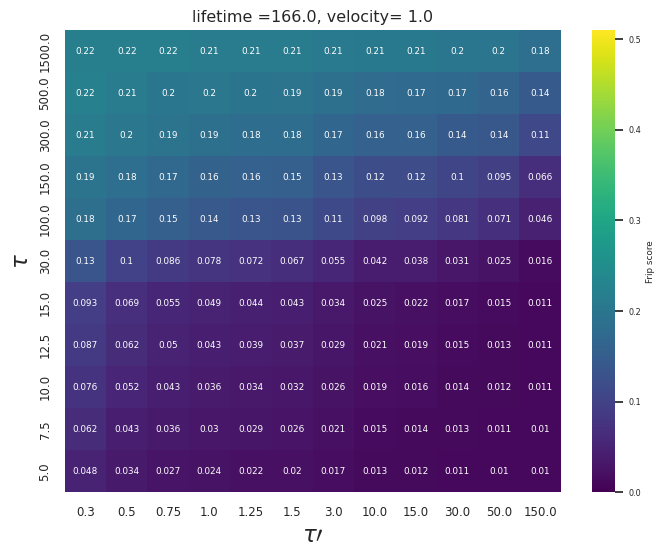

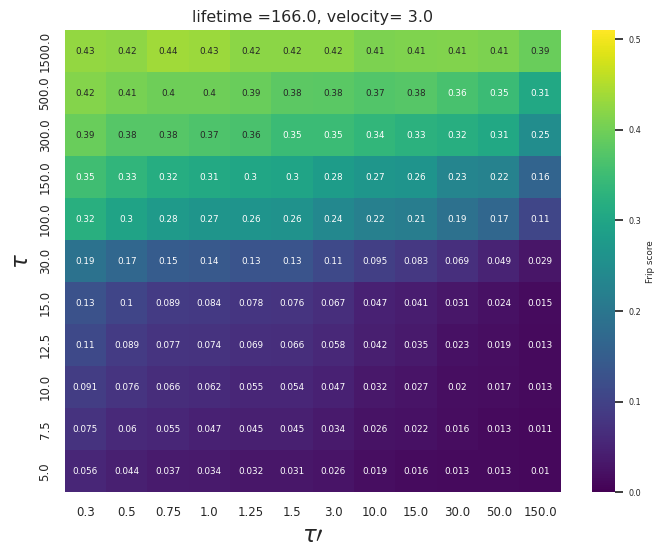

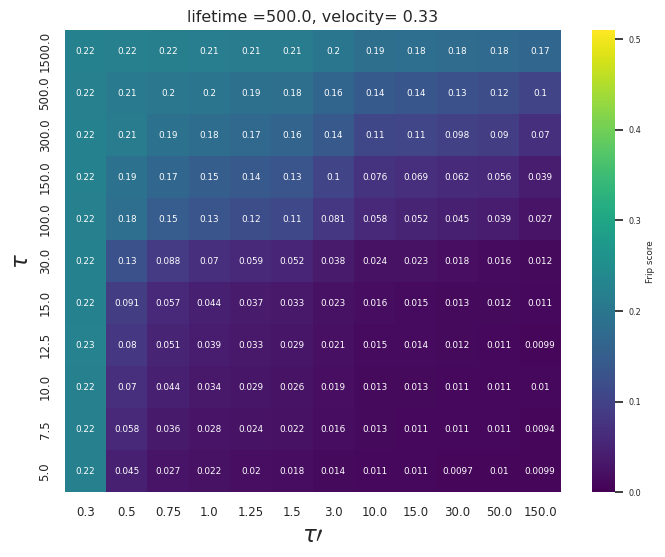

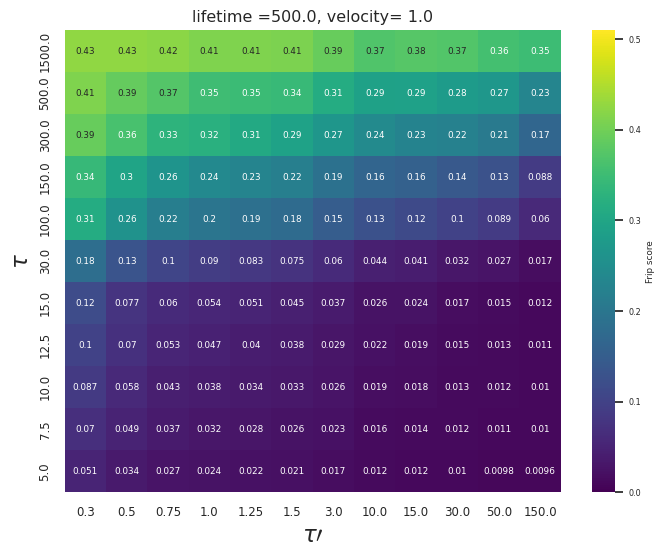

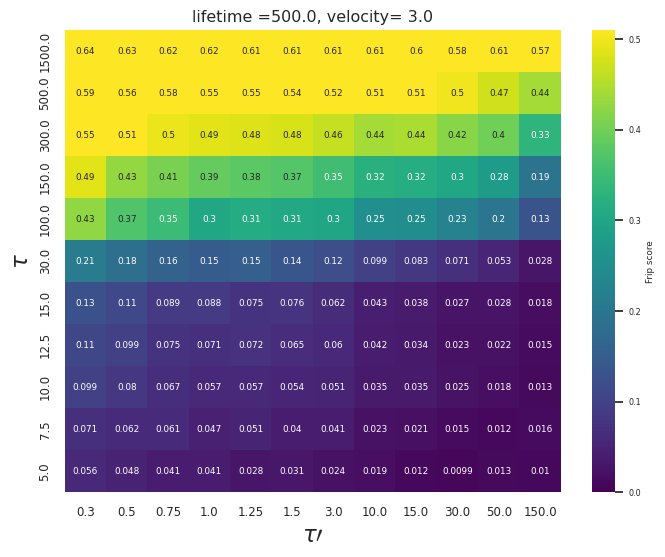

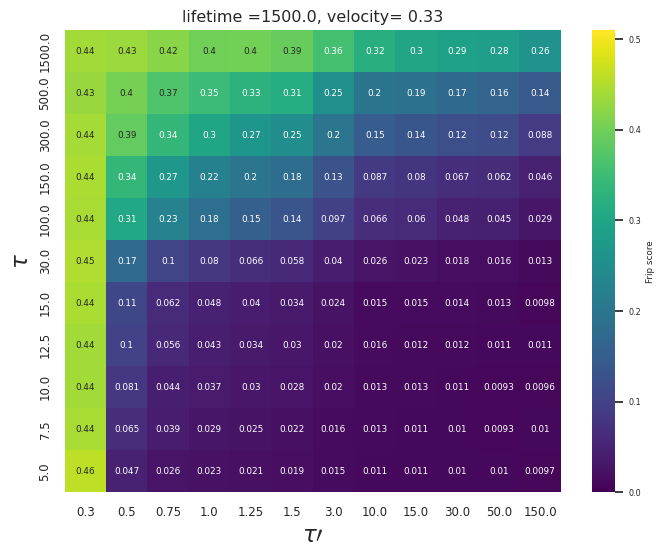

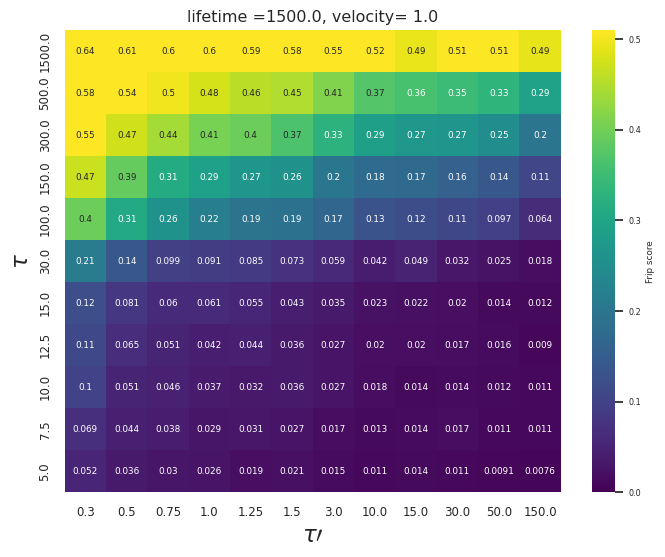

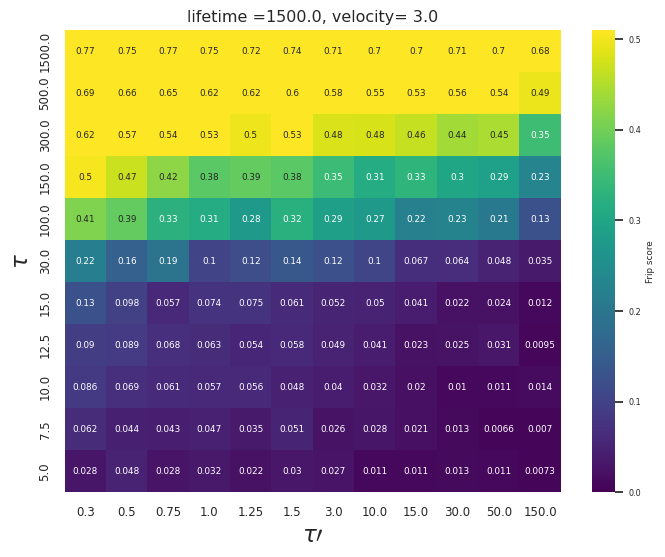

In [10]:
import seaborn as sns


for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file[(lifetime == life)&(velocity == vel) ][[' clife',' cof',' fripscore']]
        
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        
        heatmap_data = new_file_filtered.pivot(' clife', ' cof', ' fripscore')
        
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmin=0.0,vmax=0.51, cbar_kws={'label': 'Frip score'} )
        sns.set(font_scale=0.531)
        
        # Customize 
        plt.xlabel(r'$\tau\prime$', fontsize = 16.5)
        plt.xticks(fontsize =8.5)
        plt.ylabel(r'$\tau$', fontsize =16.5)
        plt.yticks(fontsize = 8.5)
        plt.title('lifetime =%s, velocity= %s'%(life, vel), fontsize = 11.5)
        plt.gca().invert_yaxis()
        plt.savefig('images/frip_for_%s_%s.png'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()

### logarithmic color bar

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


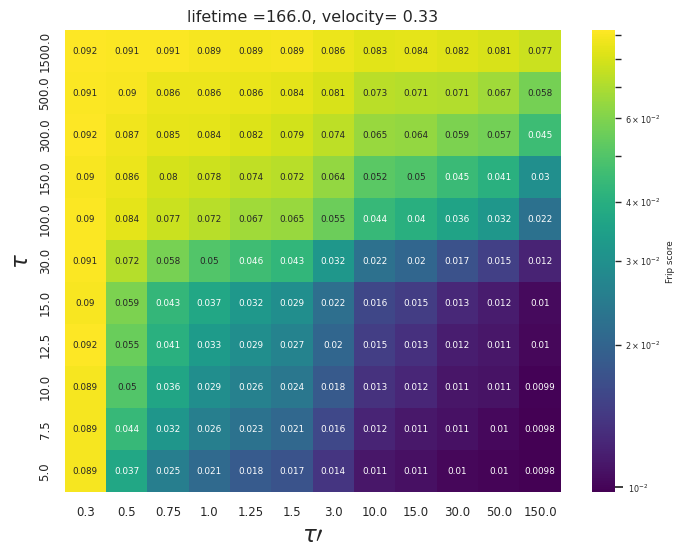

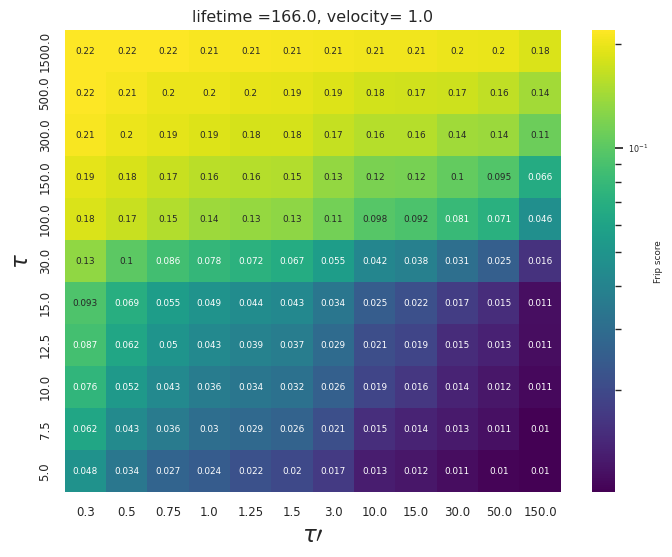

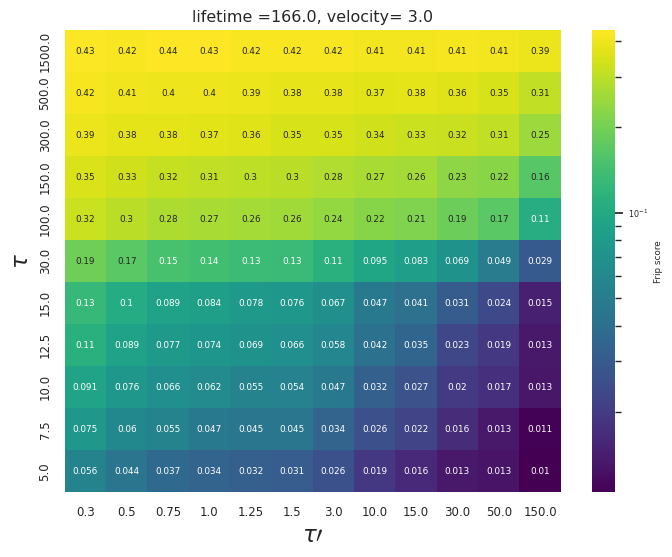

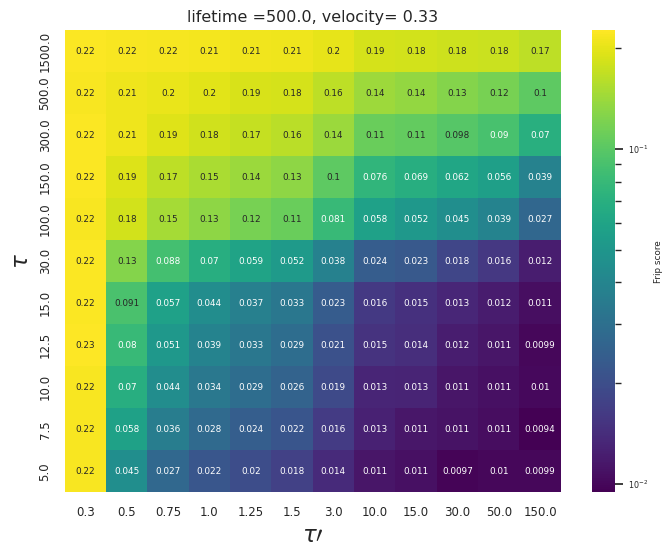

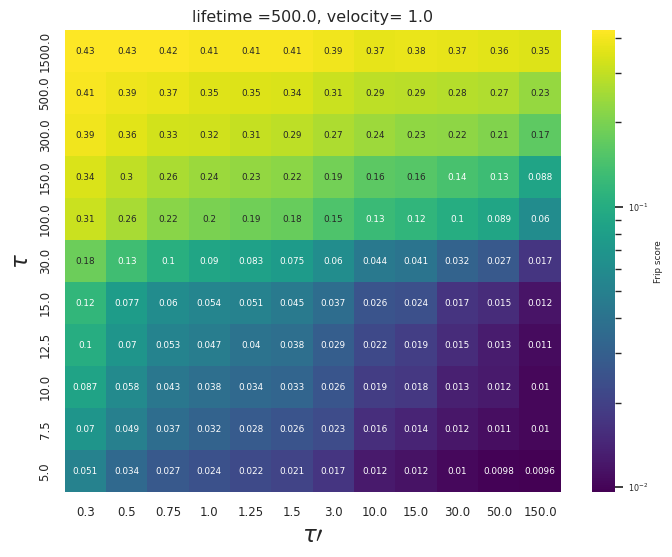

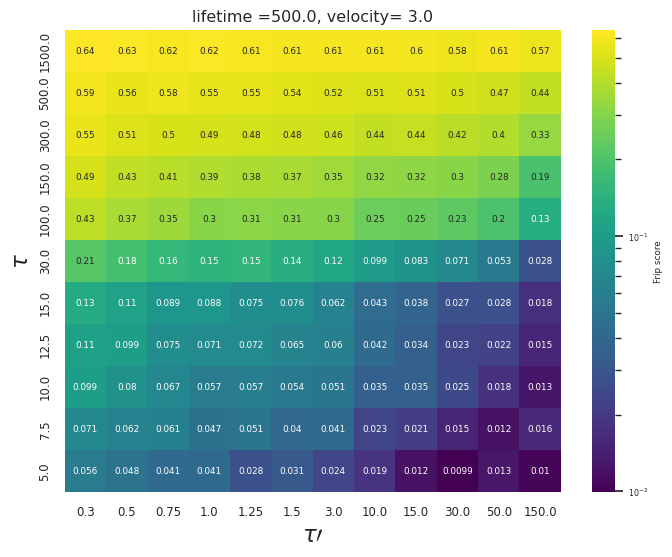

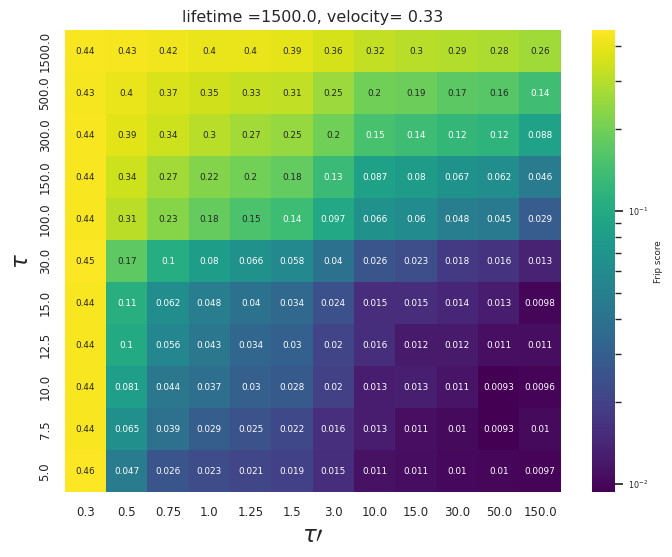

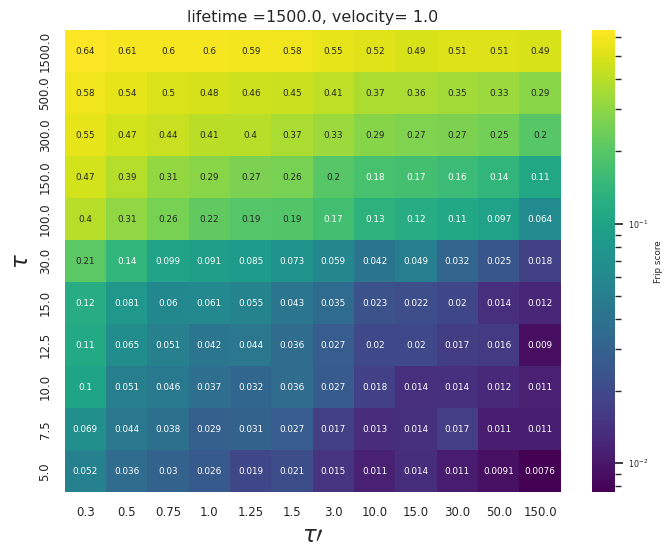

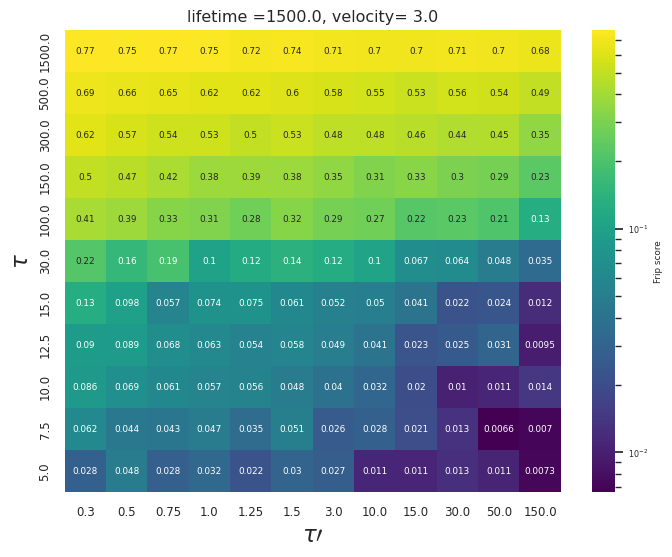

In [52]:
import seaborn as sns

from matplotlib.colors import LogNorm, Normalize
for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file[(lifetime == life)&(velocity == vel) ][[' clife',' cof',' fripscore']]
        
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        
        heatmap_data = new_file_filtered.pivot(' clife', ' cof', ' fripscore')
        
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmin=0.0,vmax=0.51, cbar_kws={'label': 'Frip score'}, norm = LogNorm())
        sns.set(font_scale=0.531)
        
        # Customize 
        plt.xlabel(r'$\tau\prime$', fontsize = 16.5)
        plt.xticks(fontsize =8.5)
        plt.ylabel(r'$\tau$', fontsize =16.5)
        plt.yticks(fontsize = 8.5)
        plt.title('lifetime =%s, velocity= %s'%(life, vel), fontsize = 11.5)
        plt.gca().invert_yaxis()
        plt.savefig('images/frip_for_%s_%s_log.png'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()